In [27]:
from osgeo import gdal
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import elevation
import earthpy.spatial as es

In [59]:
!eio clip -o Tatun-30m-DEM.tif --bounds 121.5 25.1 121.6 25.2

make: Nothing to be done for `download'.
make: Nothing to be done for `all'.
cp SRTM1.vrt SRTM1.3e2ea948c0ef4631bb7a101e3250a1ab.vrt
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 -projwin 121.5 25.2 121.6 25.1 SRTM1.3e2ea948c0ef4631bb7a101e3250a1ab.vrt /Users/nghianc/earth-analytics/Tatun-30m-DEM.tif
rm -f SRTM1.3e2ea948c0ef4631bb7a101e3250a1ab.vrt


In [60]:
filename = "Tatun-30m-DEM.tif"
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(np.float)
print(type(data_array))

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan

<class 'numpy.ndarray'>


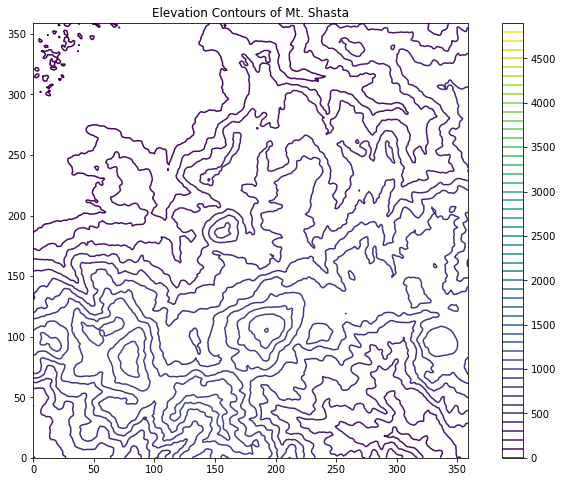

In [61]:
#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contour(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 100)))
plt.title("Elevation Contours of Mt. Shasta")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [62]:
# Create and plot the hillshade with earthpy
hillshade = es.hillshade(data_array)

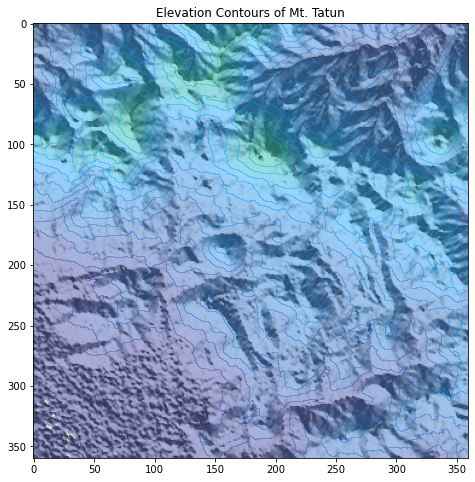

In [68]:
#Plot our data with Matplotlib's 'contourf'
fig = plt.figure(figsize = (12, 8))
cs = plt.contourf(data_array, cmap = "terrain", alpha=0.4, 
            levels = list(range(0, 5000, 100)))
plt.imshow(hillshade, cmap="Greys", alpha=0.8)
plt.title("Elevation Contours of Mt. Tatun")
# cbar = plt.colorbar(cs)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()